# Micrograd 

Este notebook está basado en el video **"[The spelled-out intro to neural networks and backpropagation: building micrograd](https://youtu.be/VMj-3S1tku0?si=VUGvwhSh3fSfze5d)"**, donde explica el **backpropagation** (la mejor clase práctica, oro puro!).

# **1. Value Class**

Esta clase nos permitirá visualizar y computar el grafo para realizar el backpropagation. En términos simples, permite almacenar un valor escalar y su gradiente.

## **1.1 Value()**

In [18]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op # Nos permite saber si es una suma o multiplicación
        self.label = label # Permite añadir una etiqueta al valor y poder mostrarlo en el grafo
        self.grad = 0.0 # Necesitamos esta variable o atributo para saber el valor del gradiente obtenido
                      # El cero indica que no afecta, no impacta en la salida.
    
    # Este método mágico permite mostrar por pantalla visualizar el valor asignado a la instancia
    def __repr__(self):
        return f"Value(data={self.data})"
    
    # Este método permite sumar clases del mismo tipo
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    # Este método permite multiplicar clases del mismo tipo
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out 

* **_nombreVariable:** El guión bajo hace referencia de que la variable será un atributo privado, es decir, que no se puede acceder desde afuera al atributo.

In [2]:
a = Value(-2.0)
b = Value(-3.0)

In [3]:
c = a * b
c

Value(data=6.0)

In [19]:
c._prev

{Value(data=-2.0), Value(data=-3.0)}

In [22]:
c._op

''

## **1.2 Graphviz**

Para instalar **Graphviz** en windows se debe realizar del ejecutable ([página oficial](https://graphviz.org/download/)) y seleccionar el PATH "Add Graphviz to system PATH for all users".

In [19]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))

        dot.node(name=uid, label='{ %s | data %.4f | grad %.4f}' % (n.label, n.data, n.grad), shape='record')

        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

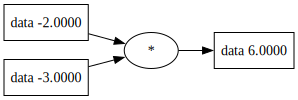

In [5]:
draw_dot(c)

In [25]:
c = a * b
d = c + a
d._op

'+'

## **1.3 Value Object y Visualización**

In [25]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

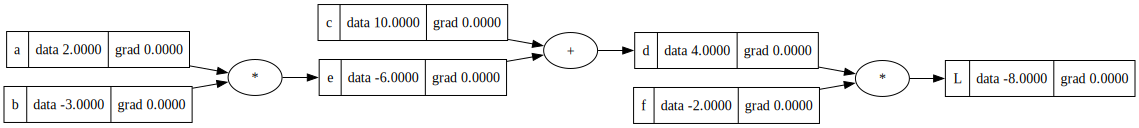

In [26]:
draw_dot(L)

### **1.3.1 Calcular la derivada de cada nodo**

A continaución, se calculará la derivada de cada nodo con respecto a L. Se realizarán los siguientes procedimientos:

1. Calcular la derivada de L con respecto a L ($\frac{\mathrm{d}' L}{\mathrm{d} L}$).
2. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} f}$).
3. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} d}$).
4. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} e}$).
5. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} c}$).
6. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} b}$).
7. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} a}$).

Se mostrará el grafo y el cambio del gradiente en el atributo.


---
Recordemos la definición de límite:

$$
f'(x) = \lim\limits_{h\rightarrow 0}\frac{f(x+h) - f(x)}{h}
$$
---


---

Recordemos la regla de la cadena utilizando la notación de Leibniz y Lagrange:

$z = f(g(x)) = (f\circ g)(x) (\text{función compuesta})$ 

$\frac{ \mathrm{d} z}{ \mathrm{d} x} = \frac{ \mathrm{d} z}{ \mathrm{d} y} \frac{ \mathrm{d} y}{ \mathrm{d} x}$

---


#### **1. Gradiente del nodo L**

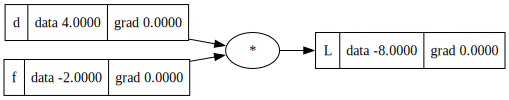

In [24]:
# Esto lo hago para visualizar, luego
def gradiente_l():
    d = Value(4.0, label='d')
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    return draw_dot(L)
gradiente_l()

$f'(x) = \lim\limits_{h\rightarrow 0}\frac{f(x+h) - f(x)}{h}$\
$L'(l) = \lim\limits_{h\rightarrow 0}\frac{l+h - l}{h} = 1$

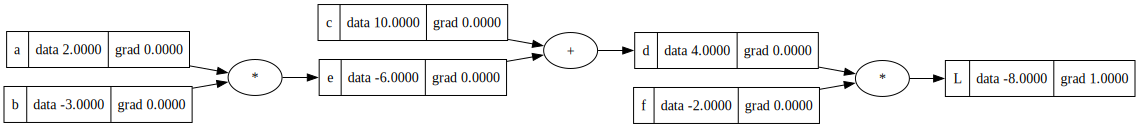

In [27]:
# Ahora debo modificar el gradiente de L
L.grad = 1.0
draw_dot(L)

#### **2. Gradiente del nodo L con respecto a f**

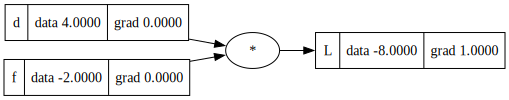

In [28]:
# Esto lo hago para visualizar, luego
def gradiente_l():
    d = Value(4.0, label='d')
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L.grad = 1.0
    return draw_dot(L)
gradiente_l()

Para obtener el gradiente de $f$, debemos obtenerlo al derivar $L$ y sabemos que $L$ es:

$L = d * f$



$f'(x) = \lim\limits_{h\rightarrow 0}\frac{f(x+h) - f(x)}{h}$\
$L'(f) = d (\lim\limits_{h\rightarrow 0}\frac{f+h - f}{h}) = d$ //Ahora reemplazamos el valor de d que es 4\
$L'(f) = 4$


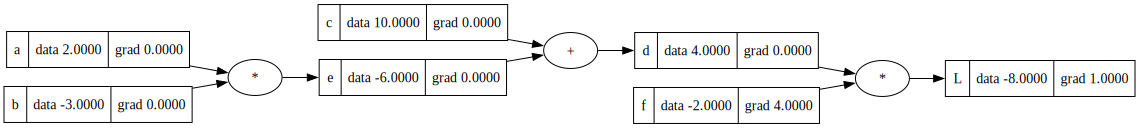

In [29]:
f.grad = 4.0
draw_dot(L)

#### **3. Gradiente del nodo L con respecto a d**

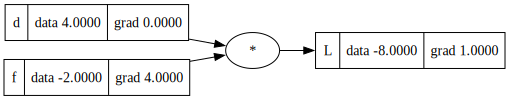

In [30]:
# Esto lo hago para visualizar y no afecte al grafo completo
def gradiente_l():
    d = Value(4.0, label='d')
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L.grad = 1.0
    f.grad = 4.0
    return draw_dot(L)
gradiente_l()

Ahora calculamos el gradiente para el nodo d. Para obtener el gradiente de $d$, debemos obtenerlo al derivar $L$ y sabemos que $L$ es:

$L = d * f$



$f'(x) = \lim\limits_{h\rightarrow 0}\frac{f(x+h) - f(x)}{h}$\
$L'(d) = f (\lim\limits_{h\rightarrow 0}\frac{d+h - d}{h}) = f$  //Ahora reemplazamos el valor de f que es -2\
$L'(d) = -2$


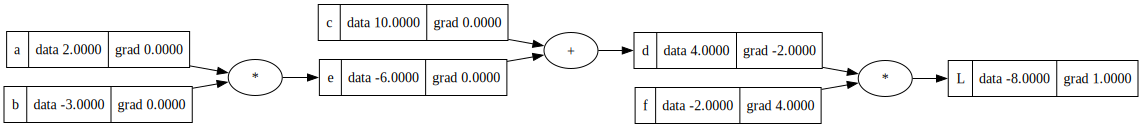

In [31]:
d.grad = -2.0
draw_dot(L)

#### **4. Gradiente del nodo L con respecto a e**

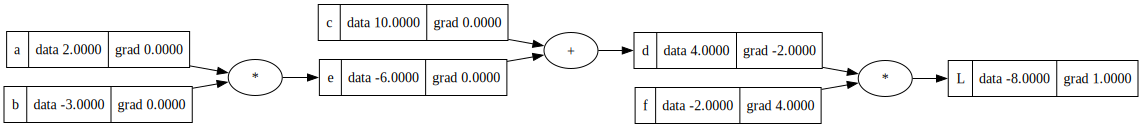

In [36]:
draw_dot(L)

Ahora tenemos la composición de más nodos por lo cual, se debe utilizar la regla de la cadena (cuando tenemos funciones compuestas). Se verán dos formas de obtener el gradiente del nodo c y e. Por el momento, tenemos:

* $\frac{\mathrm{d} L}{\mathrm{d} f} = -2.0$
* $\frac{\mathrm{d} L}{\mathrm{d} d} = 4.0$
* $c = 10.0$
* $e = -6.0$
* $f = -2.0$
* $\frac{\mathrm{d} L}{\mathrm{d} e} = ?$
* $L = d*f$ y $d = c + e$ -> $L = (c+e)*f$

**Recuerda**: Los valores de c y f son constantes.

##### 1. Regla de la cadena:

* $g(e) = c + e$ (Función interna)
* $h(x) = x * f$ (Función externa)
* $L = h(g(e))$

Para derivar L con respecto a e aplicamos la definición:

$\frac{\mathrm{d} L}{\mathrm{d} e} = h'(g(e))g'(e)$

"Evaluamos la función interna en la derivada de la función externa y luego multiplicamos por la derivada de la función interna"

* $g'(e) = 1$ (Derivada de la función interna)
* $h'(x) = f$ (Derivada de la función externa)

Sustituimos en la regla de la cadena.

$\frac{\mathrm{d} L}{\mathrm{d} e} = h'(g(e))g'(e)$

Si te fijas $h'(x)$ resultó en una constante, asi que no depende de x. **Por si quieres reemplazar g(e) y evaluar, no tiene sentido**

$h'(x) = -2.0$

$\frac{\mathrm{d} L}{\mathrm{d} e} = h'(g(e))g'(e) = -2.0 * 1$

##### 2. Producto:

$L = d*f$ y $d = c + e$ -> $L = (c+e)*f$

La derivada de un producto dice:

$$z(x) = f(x)g(x)$$
$$z'(x) = f'(x)g(x) + f(x)g'(x)$$

**Nota: f y c son constantes**

$L(e) = (c+e)'f + (c+e)f'$

##### 3. Forma Rápida:

$L = d*f$ y $d = c + e$ -> $L = (c+e)*f = fc + fe$

$L(e) = fc + fe$

$L'(e) = f$

$L'(e) = -2$

$\frac{\mathrm{d} L}{\mathrm{d} e} = -2.0$



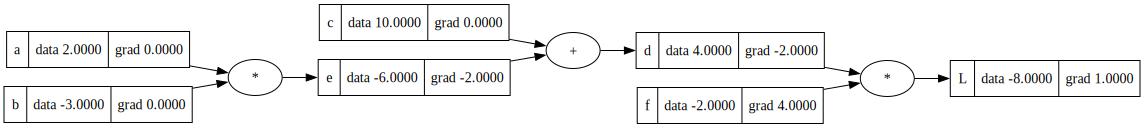

In [37]:
e.grad = -2.0
draw_dot(L)

#### **5. Gradiente del nodo L con respecto a c**

* $\frac{\mathrm{d} L}{\mathrm{d} f} = -2.0$
* $\frac{\mathrm{d} L}{\mathrm{d} d} = 4.0$
* $c = 10.0$
* $e = -6.0$
* $f = -2.0$
* $\frac{\mathrm{d} L}{\mathrm{d} e} = -2.0$
* $\frac{\mathrm{d} L}{\mathrm{d} c} = \textbf{?}$
* $L = d*f$ y $d = c + e$ -> $L = (c+e)*f$

Método rápido

**Nota**: f y e son constante con respecto a L

$L(c)=fc+fe$

$L'(c)=f$

$L'(c)=-2.0$

$\frac{\mathrm{d} L}{\mathrm{d} c} = \textbf{-2.0}$

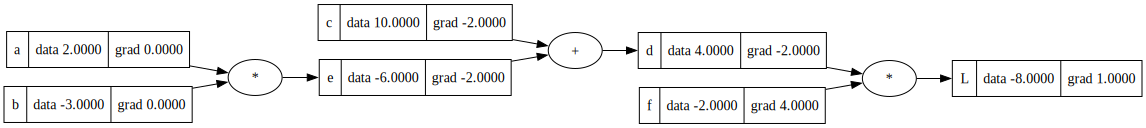

In [38]:
c.grad = -2.0
draw_dot(L)

#### **6. Gradiente del nodo L con respecto a b**

$e = a*b$

$d = e + c$

$L = 

https://cs231n.github.io/optimization-2/

https://www.youtube.com/watch?v=i94OvYb6noo